In [4]:
!pip install factor_analyzer

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=a217614e705452163a104a7ca5b539f6e6e0fb0073d9aa614bf48ed339ddb9a5
  Stored in directory: c:\users\wltjd\appdata\local\pip\cache\wheels\ed\90\48\766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Succ

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.2 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.5.0 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data/bfi.csv')
data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,NaN,1.0,6.0,1,6.0,6.0,1.0,1,3.0,19
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,3.0,3.0,6.0,3,5.0,4.0,2.0,1,4.0,27
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,1.0,5.0,1,6.0,4.0,3.0,2,4.0,29
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,4.0,1.0,5.0,2,5.0,5.0,1.0,1,4.0,31


In [7]:
data.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [10]:
#필요없는 칼럼들 drop
data.drop(['gender', 'education', 'age'],axis=1,inplace=True)
data

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67551,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,...,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,67552,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,...,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,67556,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,...,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,67559,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,...,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [11]:
# NaN 값들 삭제
data.dropna(inplace=True)

In [13]:
# 데이터 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2436 non-null   int64  
 1   A1          2436 non-null   float64
 2   A2          2436 non-null   float64
 3   A3          2436 non-null   float64
 4   A4          2436 non-null   float64
 5   A5          2436 non-null   float64
 6   C1          2436 non-null   float64
 7   C2          2436 non-null   float64
 8   C3          2436 non-null   float64
 9   C4          2436 non-null   float64
 10  C5          2436 non-null   float64
 11  E1          2436 non-null   float64
 12  E2          2436 non-null   float64
 13  E3          2436 non-null   float64
 14  E4          2436 non-null   float64
 15  E5          2436 non-null   float64
 16  N1          2436 non-null   float64
 17  N2          2436 non-null   float64
 18  N3          2436 non-null   float64
 19  N4          2436 non-null  

In [14]:
data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


적합성 검정

요인분석 수행 전 데이터 세트의 '인자 가능성'을 평가해야함.

요인 분석 가능성은 '데이터 세트에서 요인을 찾을 수 있는가?'를 의미함

요인분석 가능성(표분 추출 적합성)을 확인하는 2가지 방법

바틀렛 테스트

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(data)

chi_square_value, p_value

(18184.306307821145, 0.0)

KMO 테스트

In [19]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(data)

kmo_model

0.8483267027192363

요인 수 선택

In [22]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=25, rotation=None)

fa.fit(data)

ev, v = fa.get_eigenvalues()
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

고유값이 1보다 큰것은 6개 즉 6개의 요인만 선택해야함

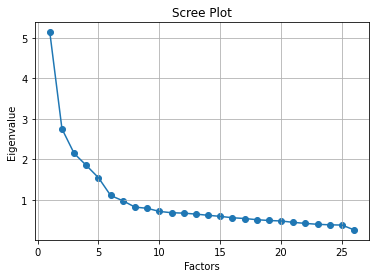

In [24]:
# Create scree plot using matplotlib

plt.scatter(range(1,data.shape[1]+1),ev)

plt.plot(range(1,data.shape[1]+1),ev)

plt.title('Scree Plot')

plt.xlabel('Factors')

plt.ylabel('Eigenvalue')

plt.grid()

plt.show()

요인분석 수행

In [33]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=6, rotation='varimax')

fa.fit(data)

temp_df = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6'])
temp_df

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,-0.022903,-0.032472,0.033169,-0.038093,0.003795,0.103748
1,0.099396,0.060474,0.026694,-0.530785,-0.120309,0.163638
2,0.031767,0.259875,0.140226,0.646569,0.055770,-0.097050
3,-0.005256,0.408849,0.109534,0.587004,0.016184,0.039149
4,-0.079266,0.255342,0.229308,0.391760,-0.136293,0.033401
5,-0.143645,0.491049,0.085649,0.451090,0.009111,0.105888
6,0.005623,0.123647,0.540150,0.004221,0.183458,0.138798
7,0.084358,0.106505,0.652496,0.056538,0.079203,0.208580
8,-0.033946,0.049796,0.545877,0.100286,-0.012372,0.054480
9,0.231617,0.008989,-0.672785,-0.089980,-0.153451,0.226977


In [34]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=5, rotation='varimax')

fa.fit(data)

temp_df = pd.DataFrame(fa.loadings_, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'])
temp_df

,Factor1,Factor2,Factor3,Factor4,Factor5
0,-0.019246,-0.061703,0.034865,-0.018678,0.014345
1,0.106455,0.030705,0.027567,-0.429612,-0.074133
2,0.028693,0.227127,0.141159,0.621801,0.064117
3,0.005335,0.329927,0.115928,0.642856,0.061647
4,-0.069443,0.209217,0.235418,0.431241,-0.108647
5,-0.129002,0.397690,0.097901,0.528159,0.075363
6,0.009548,0.048297,0.548276,0.041194,0.212169
7,0.089975,0.014459,0.650304,0.105693,0.116582
8,-0.030243,0.010825,0.555781,0.114165,-0.004812
9,0.240794,-0.039326,-0.633576,-0.041462,-0.109695


In [37]:
temp_df = pd.DataFrame(fa.get_factor_variance(), columns=['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'], \
                       index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'])
temp_df

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.736109,2.428049,2.082504,1.800505,1.549502
Proportion Var,0.105235,0.093387,0.080096,0.069250,0.059596
Cumulative Var,0.105235,0.198621,0.278718,0.347968,0.407564
